# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, NuSVR, LinearSVR, SVC, NuSVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from collections import Counter

import itertools as it
import nltk as nltk
from nltk.corpus import stopwords

In [16]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,Unnamed: 0,hotel,commentaire,note,commmentaire
0,0,Novotel Paris Les Halles,Après l'annulation de notre voyage aux philipp...,50,Après l'annulation de notre voyage aux philipp...
1,1,Novotel Paris Les Halles,Ce fut un séjour plus que parfait! L’accueil é...,50,Ce fut un séjour plus que parfait! L’accueil é...
2,2,Novotel Paris Les Halles,L'accueil à mon arrivée est toujours très chal...,50,L'accueil à mon arrivée est toujours très chal...
3,3,Novotel Paris Les Halles,Nous avons séjourné dans cet hôtel avec nos 2 ...,50,Nous avons séjourné dans cet hôtel avec nos 2 ...
4,4,Novotel Paris Les Halles,…,50,…


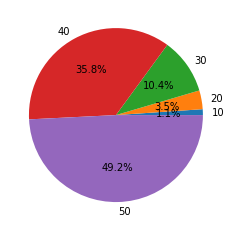

In [59]:
plt.pie([reviews.note.value_counts()[i] for i in l],labels=l,autopct='%1.1f%%')
plt.show()
#si '10'<5% besoin ajout données

Unnamed: 0      0
hotel           0
commentaire     0
note            0
commmentaire    0
dtype: int64 
 Unnamed: 0      0.0
hotel           0.0
commentaire     0.0
note            0.0
commmentaire    0.0
dtype: float64


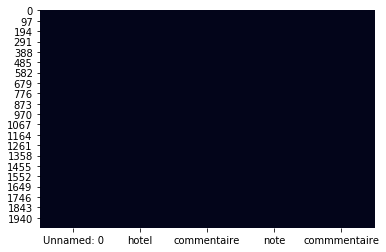

In [61]:
# Analyse des valeurs manquantes
na = reviews.isnull().sum()
nap = na/len(df)
print(na,'\n',nap)
sns.heatmap(reviews.isna(),cbar=False)
plt.show()

In [6]:
# Droper colonnes peu denses : df.drop(df.columns[range(2,5)],axis=1,inplace=True)

In [62]:
# Enlever ponctuation et mots de liaison inutiles
def sup_ponctuations(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    return pas_de_ponc.lower()

def mots_inutiles(commentaires):
    mots = stopwords.words('french')
    comm_nettoyés = " "
    for mot in commentaires.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés

In [63]:
reviews["commentaire"] = reviews["commentaire"].apply(mots_inutiles,sup_ponctuations)
reviews

,Unnamed: 0,hotel,commentaire,note,commmentaire
0,0,Novotel Paris Les Halles,Après l'annulation voyage philippines chance...,50,Après l'annulation de notre voyage aux philipp...
1,1,Novotel Paris Les Halles,Ce séjour plus parfait! L’accueil minutieux....,50,Ce fut un séjour plus que parfait! L’accueil é...
2,2,Novotel Paris Les Halles,L'accueil arrivée toujours très chaleureux c...,50,L'accueil à mon arrivée est toujours très chal...
3,3,Novotel Paris Les Halles,Nous séjourné cet hôtel 2 jeunes enfants. No...,50,Nous avons séjourné dans cet hôtel avec nos 2 ...
4,4,Novotel Paris Les Halles,…,50,…
...,...,...,...,...,...
2029,2029,Novotel Paris Les Halles,…,10,…
2030,2030,Novotel Paris Les Halles,Nous passé 6 nuits chambre Executive Novotel...,40,Nous avons passé 6 nuits dans une chambre Exec...
2031,2031,Novotel Paris Les Halles,À l'intérieur c'est Novotel standard. Bon ni...,40,À l'intérieur c'est votre Novotel standard. Bo...
2032,2032,Novotel Paris Les Halles,Une excellente emplacement - peut aller pied...,40,Une excellente emplacement - on peut aller à p...


# Analyse des données

            0     1
0        très  1968
1           a   952
2          Le   930
3     chambre   852
4        bien   804
5   personnel   708
6        Nous   693
7       hôtel   616
8       petit   597
9         Les   571
10          !   497
11   déjeuner   488
12         La   480
13   chambres   443
14        cet   440
15       tout   414
16    l'hôtel   410
17       plus   386
18         Je   349
19        bon   348


<BarContainer object of 20 artists>

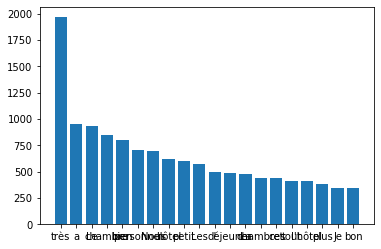

In [64]:
# Mots les plus fréquents
freq = pd.DataFrame(Counter(' '.join(reviews['commentaire']).split()).most_common(20))
print(freq)
plt.bar(freq[0],freq[1])

In [68]:
vec = CountVectorizer(stop_words = 'english')
'''
convert a collection of text documents to a matrix of token counts, sparse representation
default number of features = vocabulary size
'''

X = vec.fit_transform(reviews.commentaire).toarray()

print(X.shape)

is_pos = reviews.note.map({50:1,40:1,30:0,20:0,10:0})
is_pos

(2034, 7636)


0       1
1       1
2       1
3       1
4       1
       ..
2029    0
2030    1
2031    1
2032    1
2033    1
Name: note, Length: 2034, dtype: int64

# Data splitting

In [69]:
y = reviews.note
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)
'''
test_size pourcentage de lignes testé
random_state graine du générateur de nombre aléatoire
stratify affecte un label au split stratifié, répartition équitable avec Y
'''
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1423, 7636) (611, 7636) (1423,) (611,)


# Modélisation et Performances

In [ ]:
#
param_grid = {'C':[10,50,100],'kernel':['rbf','sigmoid']}
param_grid
#
gscv = GridSearchCV(
    SVC(),
    param_grid,
    cv = 3) #cv par défaut =5
gscv.fit(X_train,Y_train)
gscv.best_params_ #changer les params selon le résultat obtenu, ex réduire C

In [15]:
gscv.best_score_

0.9741025641025641

In [ ]:
#4
best_model = gscv.best_estimator_
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print(pred_train,pred_test)
#5
print(classification_report(Y_train,pred_train),'\n',classification_report(Y_test,pred_test))